# Исследование о продаже игр в интернет-магазине "Стримчик"

Магазин "Стримчик" по всему миру продает компьютерные игры, принадлежащих к различным жанрам и категориям, в т.ч. возрастным.

**Описание данных.** Есть данные о продаже игр 2016 года в разных частях света, выпускающихся на различных платформах и с разным возрастным рейтингом. Имеющиеся данные:<br>

* **Name** — название игры <br>
* **Platform** — платформа <br>
* **Year_of_Release** — год выпуска <br>
* **Genre** — жанр игры <br>
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий) <br>
* **EU_sales** — продажи в Европе (миллионы проданных копий) <br>
* **JP_sales** — продажи в Японии (миллионы проданных копий) <br>
* **Other_sales** — продажи в других странах (миллионы проданных копий) <br>
* **Critic_Score** — оценка критиков (максимум 100) <br>
* **User_Score** — оценка пользователей (максимум 10) <br>
* **Rating** — возрастной рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

**Цель**. По данным 2016 года необходимо спрогнозировать план продаж на 2017 год. 

**План работы**. Cделать предобработку данных с удалением дубликатов и аномальных значений, исправлением типов данных, заполнением пропущенных значений. Необходимо выявить закономерности между данными и их взаимосвязь. А также проверить гипотезы, связанные с планом продаж на 2017-й год

## Изучить общую информацию

In [105]:
#Уберем warnings, чтобы не мешали
import warnings

warnings.filterwarnings("ignore")

In [106]:
#Подгружаем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pylab as pl

In [107]:
#Открываем файл
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


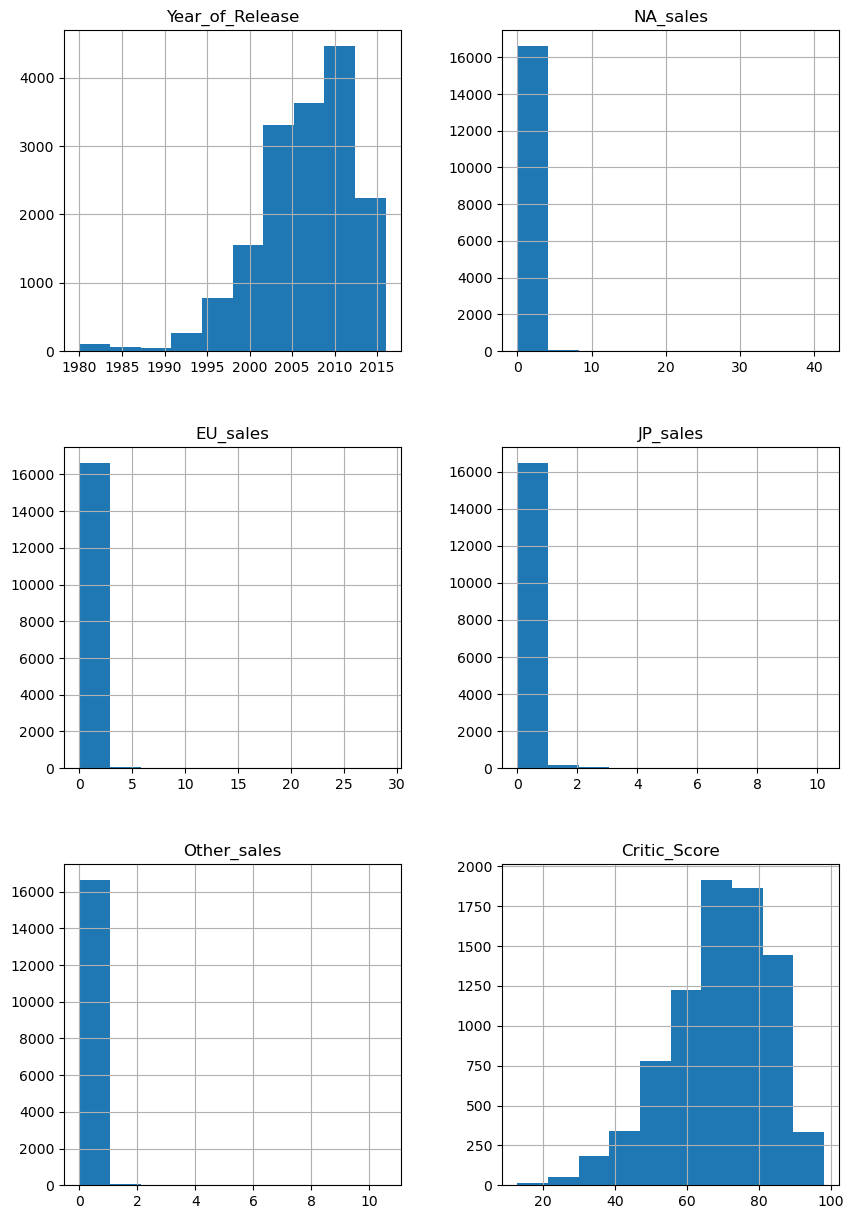

In [109]:
#Выведем гистограммы
data.hist(figsize=(10, 15));

**Выводы**:

По данным гистограммам видно:

1) В данных с продажами есть вылетающие и аномальные значения; <br>
2) В магазине в продаже больше всего игр начала 10-х годов; <br>
3) Самые распространенные оценки игр у критиков находятся в пределах 70-80 баллов. <br>

На следующем этапе необходимо устранить дубликаты, аномальные значения, исправить типы данных и заполнить пропущенные значения.

## Предобработка данных

### Замена названий столбцов

Начнем с переименования столбцов, а точнее приведения их названия к нижнему регистру

In [110]:
#Приводим названия столбцов к нижнему регистру   
data.columns = data.columns.str.lower()

Далее проверим наличие полных дубликатов

In [111]:
data.duplicated().sum()

0

Теперь проверим таблицу на неявные дубликаты. Количество игр огромное, каждая из них имеет свое название. Поэтому все приведем к нижнему регистру и посмотрим, есть ли повторяющиеся названия.

In [112]:
data.loc[data['name'].isna() == True, 'name'] = '' 

names = []
for i in data['name']:
    i = i.lower()
    names.append(i)

data['name'] = names
data.sort_values('name').head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
659,,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14983,beyblade burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,fire emblem fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3862,frozen: olaf's quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,frozen: olaf's quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
13794,haikyu!! cross team match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2454,tales of xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4728,'98 koshien,PS,1998.0,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8342,.hack//g.u. vol.1//rebirth,PS2,2006.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN


Повторяющиеся названия игр действительно есть, но они связаны в подавляющем большинстве случаев с их выходом на разных платформах. Поэтому будем считать, что дубликатов нет.

### Преобразование данных в нужные типы

Теперь переведем в нужный тип данных некоторые столбцы

In [113]:
#Преобразуем столбец с годом в целочисленный формат
data.loc[data['year_of_release'].isna() == False, 'year_of_release'] = \
data.loc[data['year_of_release'].isna() == False, 'year_of_release'].astype('Int64')

In [114]:
#Сделаем новый столбец с оценкой пользователей в числовом формате float, при этом значения с ошибкой заменим на Nan
#P.S. Почему-то не сработал ignore в errors, формат object оставался в т.ч. и для чисел
data['user_score_1'] = pd.to_numeric(data['user_score'], errors='coerce')

#Теперь посмотрим, какие значения были ошибочными
data.loc[(data['user_score_1'].isna() == True) & (data['user_score'].isna() == False)].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1
119,zumba fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,NaN
301,namco museum: 50th anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,NaN
520,zumba fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,NaN
645,udraw studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,NaN
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,NaN
718,just dance kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,NaN
726,dance dance revolution x2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,NaN
821,the incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,NaN
881,who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,NaN
1047,tetris worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E,NaN


Все ошибки перевода в числовой формат связаны с абревиатурой TBD, что означает 'to be determined - будет определено'. Вероятно, данные игры собрали очень малое количество оценок пользователей или вообще ими не оценивались. Возможно, это связано с малым количеством продаж. Проверим эту гипотезу, но перед этим сделаем столбец с суммарными продажами.

In [115]:
#Добавляем столбец с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#Сделаем сортировку по количеству продаж для среза таблицы с tbd
(data
 .loc[(data['user_score_1'].isna() == True) & (data['user_score'].isna() == False)]
 .sort_values('total_sales', ascending = False)
 .head(5)
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1,total_sales
119,zumba fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,NaN,6.70
301,namco museum: 50th anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,NaN,3.97
520,zumba fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,NaN,2.81
645,udraw studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,NaN,2.42
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,NaN,2.40


In [116]:
#Сделаем теперь сортировку по данным, где есть оценка от пользователей
(data
 .loc[(data['user_score_1'].isna() == False)]
 .sort_values('total_sales')
 .head(5)
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1,total_sales
16705,15 days,PC,2009.0,Adventure,0.00,0.01,0.0,0.0,63.0,5.8,NaN,5.8,0.01
16088,contrast,PC,2013.0,Platform,0.00,0.01,0.0,0.0,62.0,7.7,T,7.7,0.01
16085,blackthorne,GBA,2003.0,Action,0.01,0.00,0.0,0.0,67.0,7.6,T,7.6,0.01
16078,imperium romanum,PC,2008.0,Strategy,0.00,0.01,0.0,0.0,63.0,7.5,E10+,7.5,0.01
16074,evil genius,PC,2004.0,Strategy,0.00,0.01,0.0,0.0,75.0,8.3,T,8.3,0.01


Из данного сравнения видно, что оценки пользователей есть и у игр с очень малым количеством продаж. В то же время оценки игроков нет у игр с достаточно большим количеством продаж. Также видно, что это не связано с годом релиза, поэтому гипотеза о том, что, например, в какие-то годы не было адекватного сервиса оценки, отпадает. В связи с этим, так как непонятно, какую оценку могли выставить пользователи за определенную игру, оставим значения tbd пока пустыми. 

In [117]:
data['user_score'] = data['user_score_1']
data = data.drop('user_score_1', axis=1)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


### Обработка пропусков

Теперь заполним пропущенные значения, где это возможно. Видно, что заполнять значения имеет смысл только для оценок критиков, пользователей и возрастного рейтинга. Сначала примем, что если игра выходила на других платформах, то она должна иметь такой же возрастной рейтинг.

In [119]:
#Сначала каждому рейтингу присвоим численное значение
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [120]:
data['rating_1'] = data['rating'].map({'E': 1, 'M': 2, 'T': 3, 'E10+': 4, 'K-A': 5, 'AO': 6, 'EC': 7, 'RP': 8})
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_1
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,1.0
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,1.0
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.0
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [121]:
#Cоздадим функцию, которая будет заменять пропущенные значения для одинаковых игр, если она выходила на разных платформах
def same_game(x):
    for i in data['name'].unique():
        data.loc[(data['name'] == i) & (data[x].isna() == True), x] = \
        data.loc[data['name'] == i, x].mean()
    return x

#Применим функцию к рейтингу
same_game('rating_1')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
 12  rating_1         10386 non-null  float64
dtypes: float64(9), object(4)
memory usage: 1.7+ MB


Видно, что несколько пропущенных значений удалось заменить. Проведем теперь обратную замену. 

In [122]:
data['rating_1'] = data['rating_1'].map({1:'E', 2:'M', 3:'T', 4:'E10+', 5:'K-A', 6:'AO', 7:'EC', 8:'RP'})
data['rating'] = data['rating_1']
data = data.drop('rating_1', axis=1)
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           10368 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Теперь попробуем заменить пропущенные значения для оценок. Воспользуемся той же логикой, что и с рейтингом. Но для начала надо проверить, насколько различаются оценки для одних и тех же игр на разных платформах 

In [123]:
#Найдем 5 игр с самым большим количеством повторений и сделаем по ним сравнение
(data
 .loc[data['name'].duplicated() == True]
 .groupby('name')
 .agg('count')
 .sort_values('platform', ascending=False)
 .head(5)['platform']
)

name
need for speed: most wanted    11
fifa 14                         8
ratatouille                     8
madden nfl 07                   8
lego marvel super heroes        8
Name: platform, dtype: int64

In [124]:
(data
 .loc[(data['name'] == 'need for speed: most wanted') |
      (data['name'] == 'fifa 14') |
      (data['name'] == 'ratatouille') |
      (data['name'] == 'madden nfl 07') |
      (data['name'] == 'lego marvel super heroes'), ('name', 'platform', 'critic_score','user_score')]
 .sort_values('name')
)
      

,name,platform,critic_score,user_score
126,fifa 14,PS3,86.0,4.3
7875,fifa 14,PSP,NaN,3.4
271,fifa 14,X360,84.0,4.2
469,fifa 14,PS4,87.0,6.3
4699,fifa 14,PSV,NaN,1.8
6871,fifa 14,3DS,NaN,NaN
1753,fifa 14,XOne,88.0,5.8
4809,fifa 14,PC,87.0,4.6
4985,fifa 14,Wii,NaN,4.3
2313,lego marvel super heroes,3DS,61.0,5.2


По данной таблице видно, что значения для разных платформ могут сильно различаться для одних и тех же игр. Получается, что даже для одних и тех же игр нельзя заполнять пропущенные значения в столбцах с оценками как критиков, так и пользователей. <br>
Также из данной таблицы видно, что у критиков и игроков могут быть кардинально разные оценки, поэтому заполнять пропущенные значения у пользователей по оценке критиков будет не совсем верно.

Теперь рассмотрим, как распределяются значения для продаж на диаграмме с усами 

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

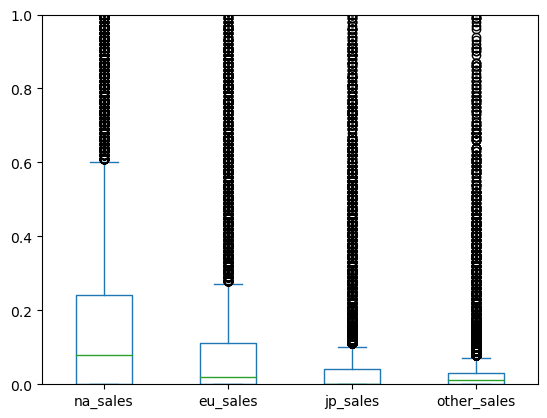

In [125]:
data.plot(kind='box', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], ylim=(0,1))
data['na_sales'].describe()

Судя по диаграммам, очень много игр имеют плохие продажи, вплоть до 0, поэтому их отсекать нежелательно. Также нежелательно отсекать и игры с большими продажами, хоть их и немного, т.к. они могут внести большой вклад в прогнозирование продаж на следующий год

**Выводы**:

Выполнена предобработка данных:

1) Изменены названия столбцов; <br>
2) Таблица проверена на дубликаты; <br>
3) Заменены пропущенные значения, где это было возможно <br>

Далее можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных 

### Сколько игр выпускалось в разные годы?

In [126]:
#Посмотрим, сколько игр выпускалось по годам
data.groupby('year_of_release').agg('count')['name']

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

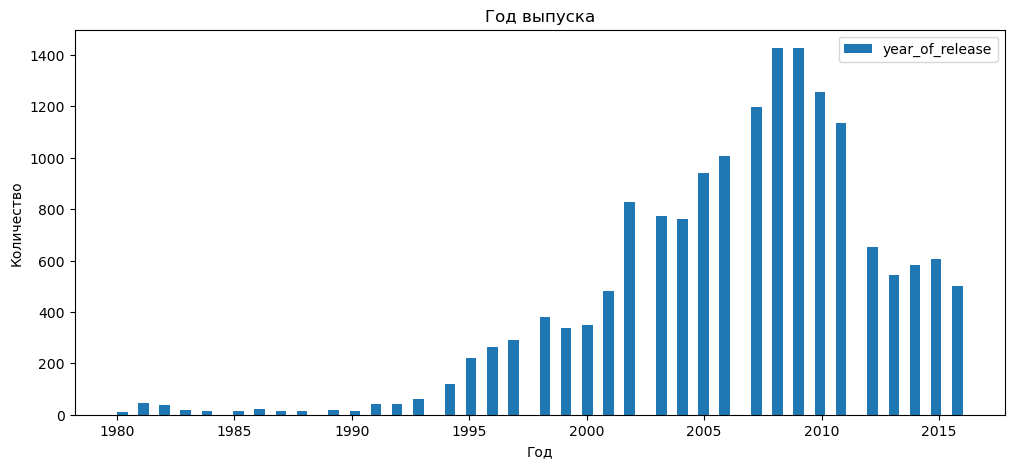

In [127]:
data.plot(kind='hist', 
          y='year_of_release', 
          bins=80, 
          figsize=(12,5), 
          title='Год выпуска',
         );
plt.xlabel('Год');
plt.ylabel('Количество');

По таблице и диаграмме видно, что период до 2000 года нас мало может интересовать, так как таких игр достаточно мало и в дальнейшем их популярность будет падать. 

### Анализ динамики продаж по платформам

In [128]:
#Выберем 10 платформ с наибольшими суммарными продажами
rating_platform = data.groupby('platform').agg(total_sales=('total_sales','sum')).sort_values(by='total_sales', ascending=False)
rating_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


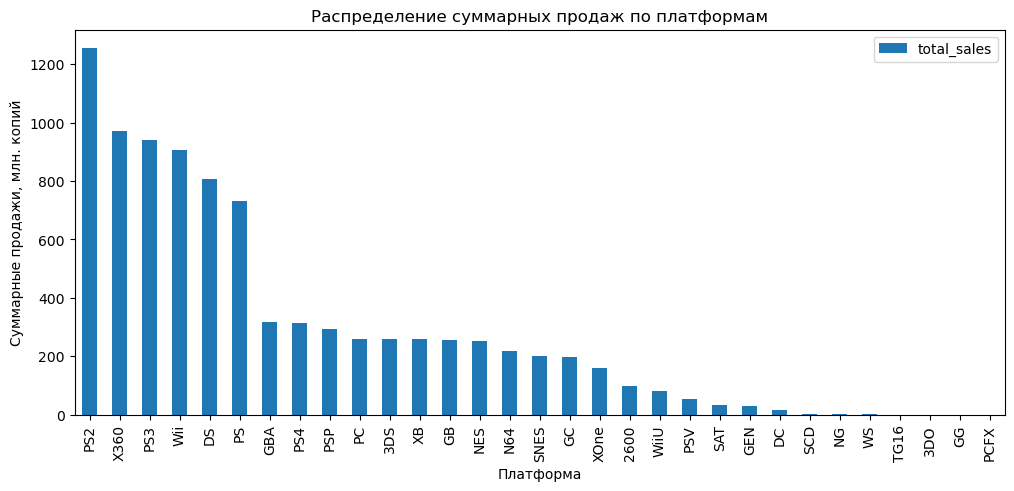

In [129]:
rating_platform.plot(kind='bar', 
                  figsize=(12,5), 
                  title='Распределение суммарных продаж по платформам', 
                  xlabel='Платформа', 
                  ylabel='Суммарные продажи, млн. копий',);

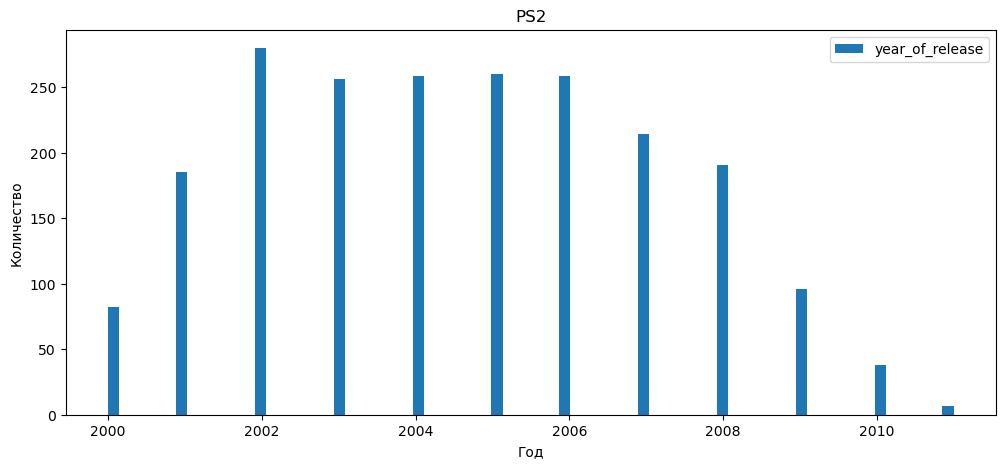

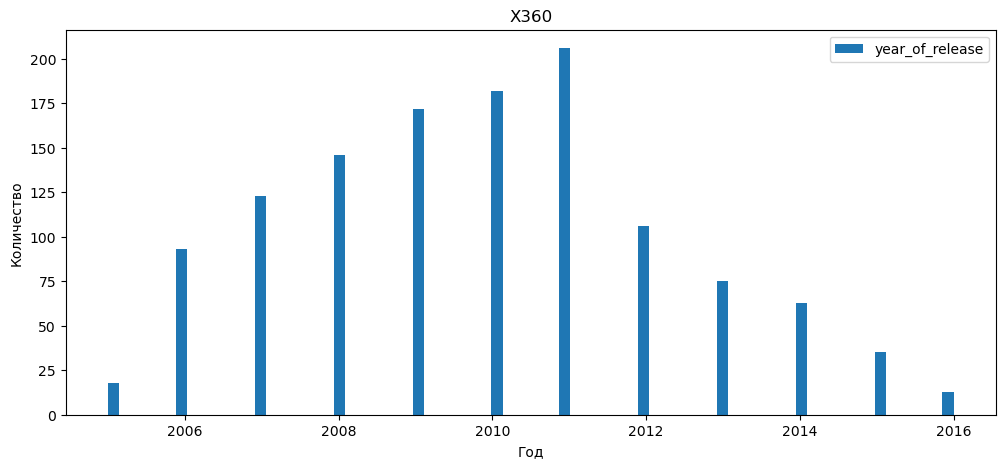

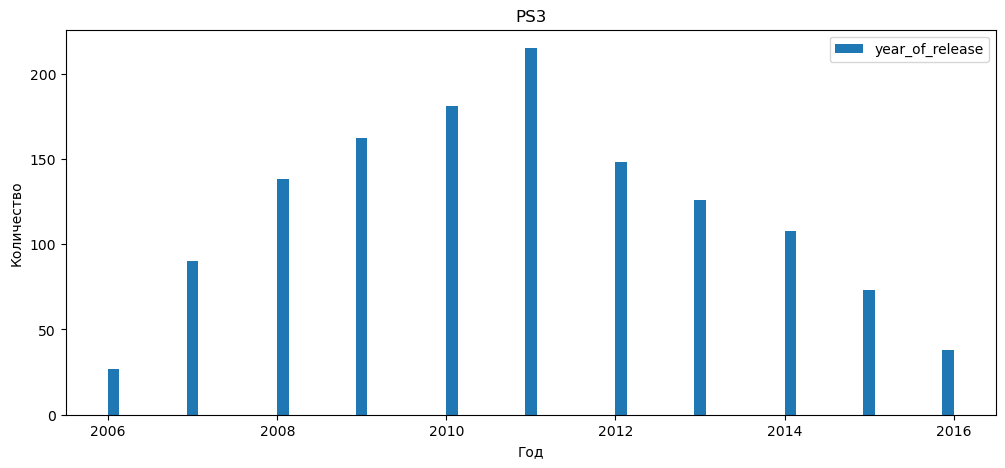

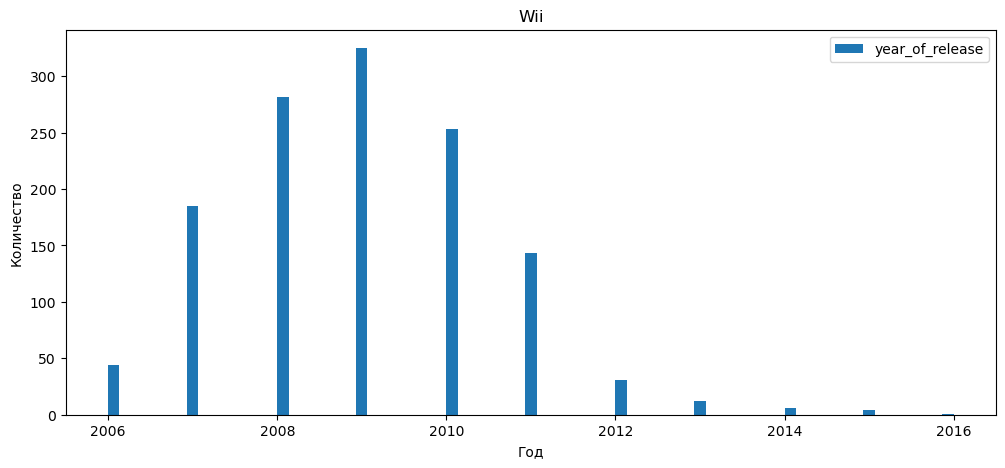

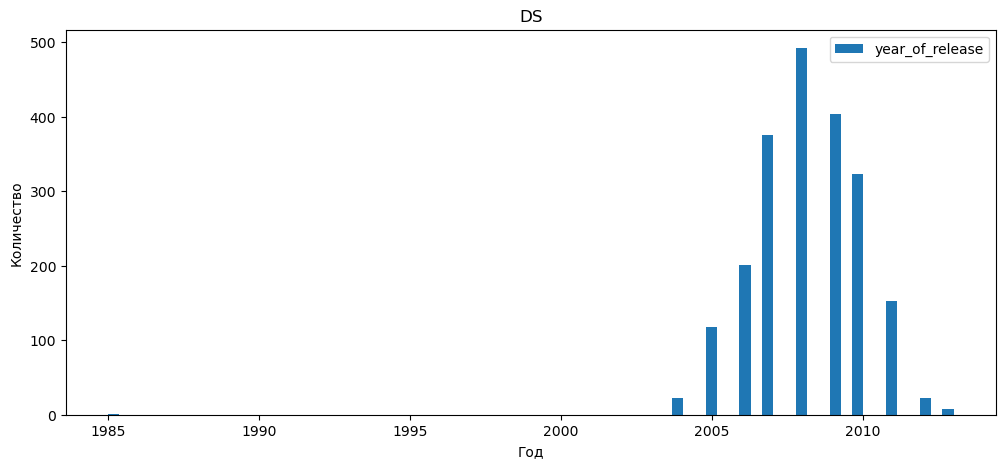

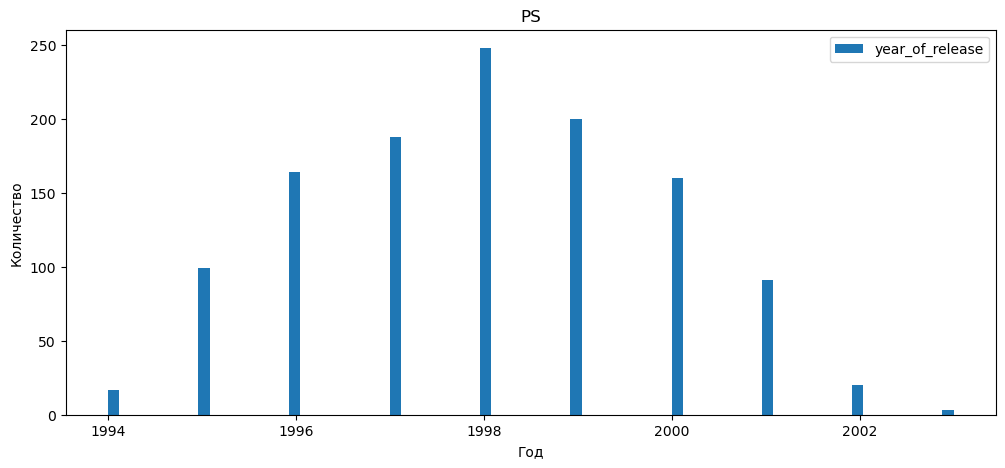

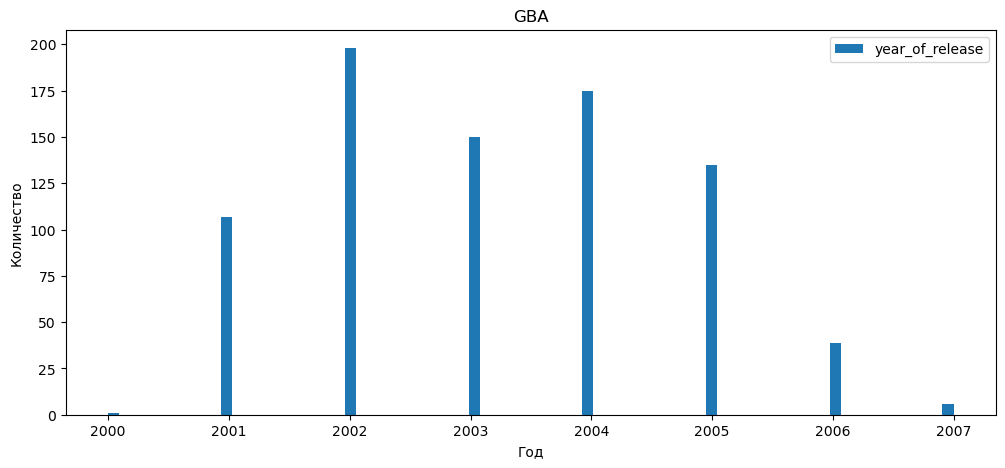

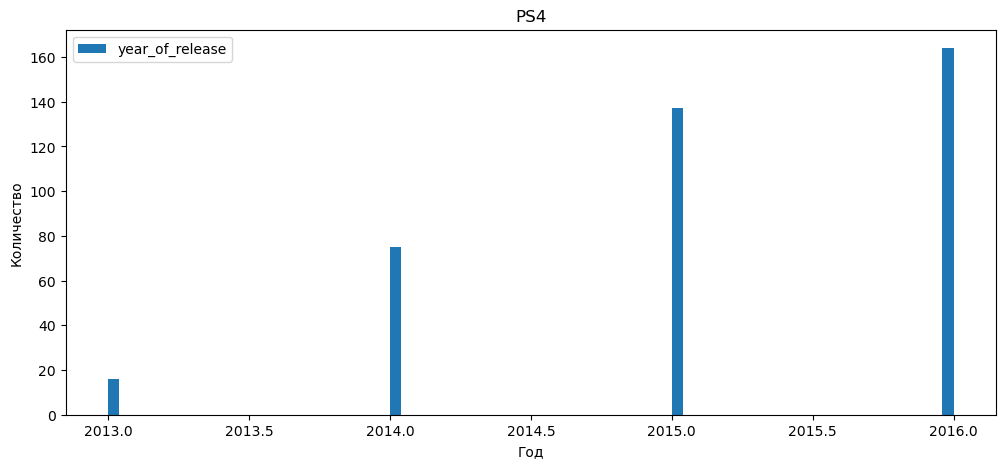

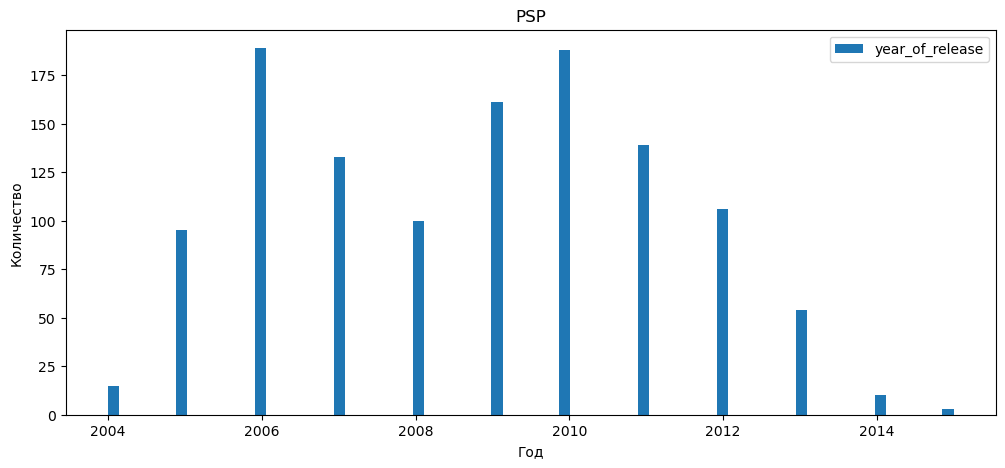

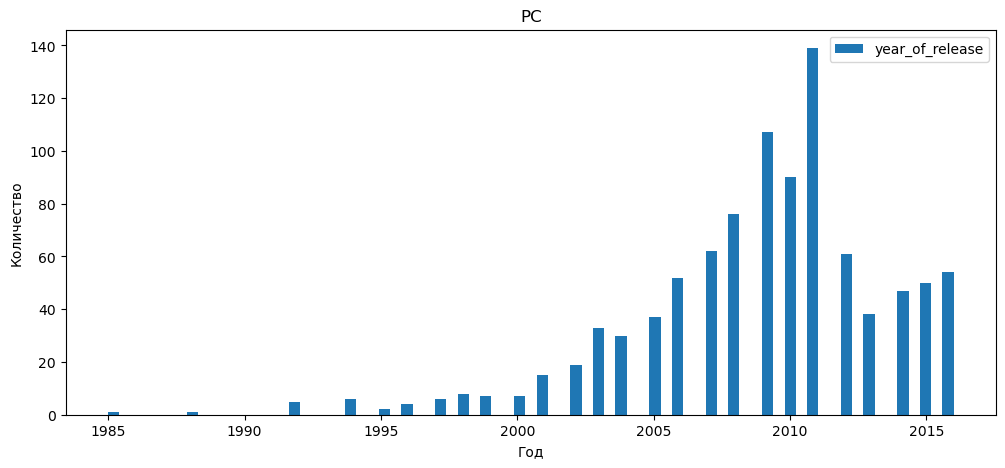

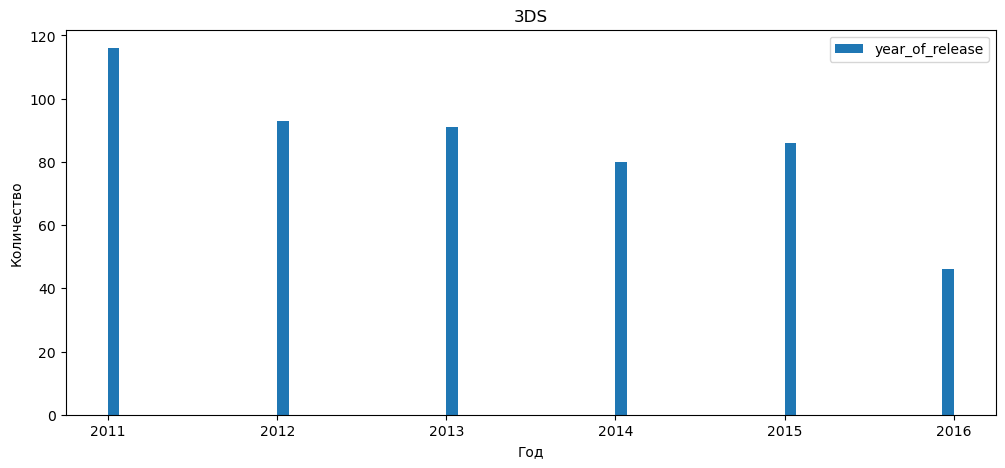

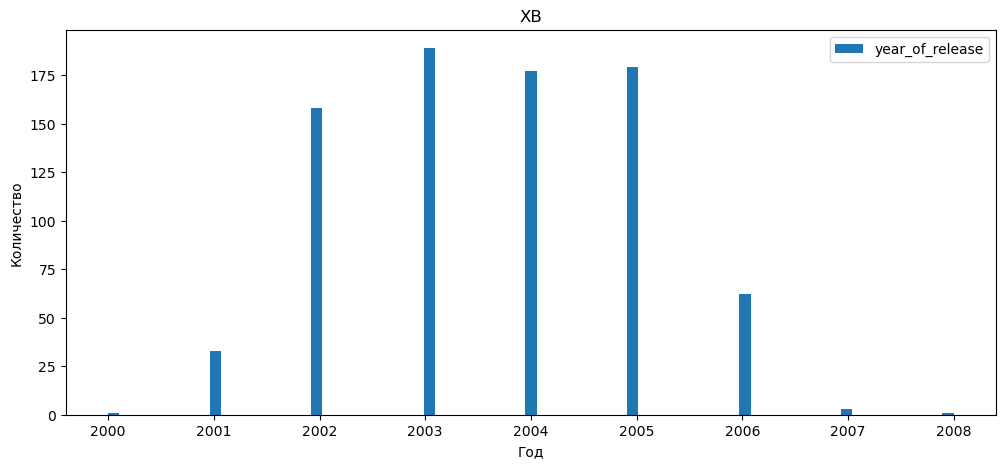

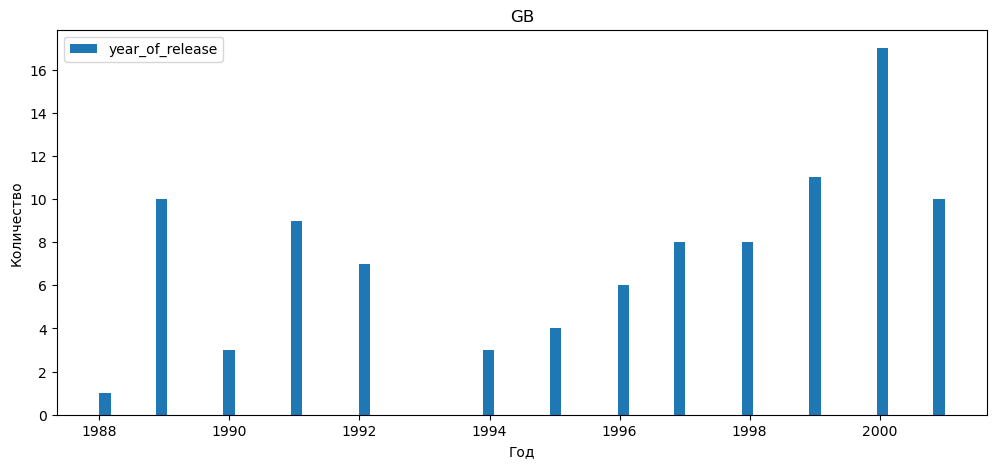

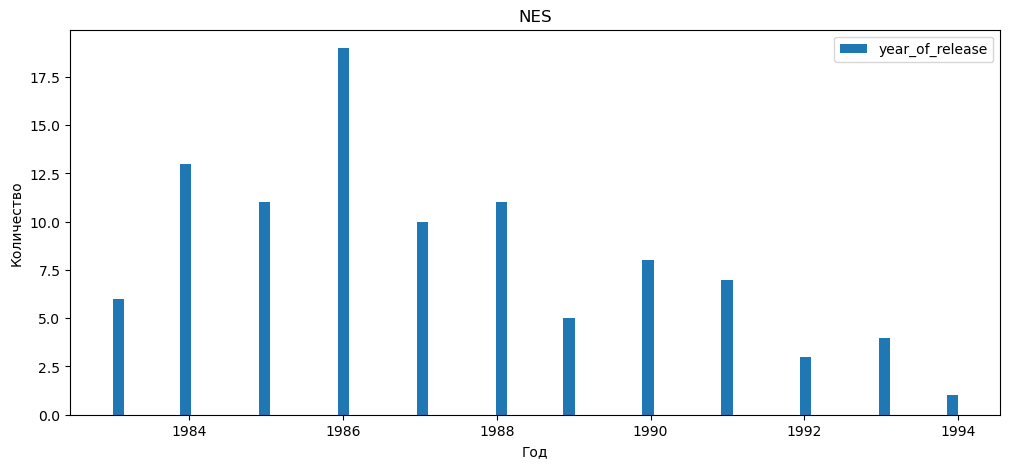

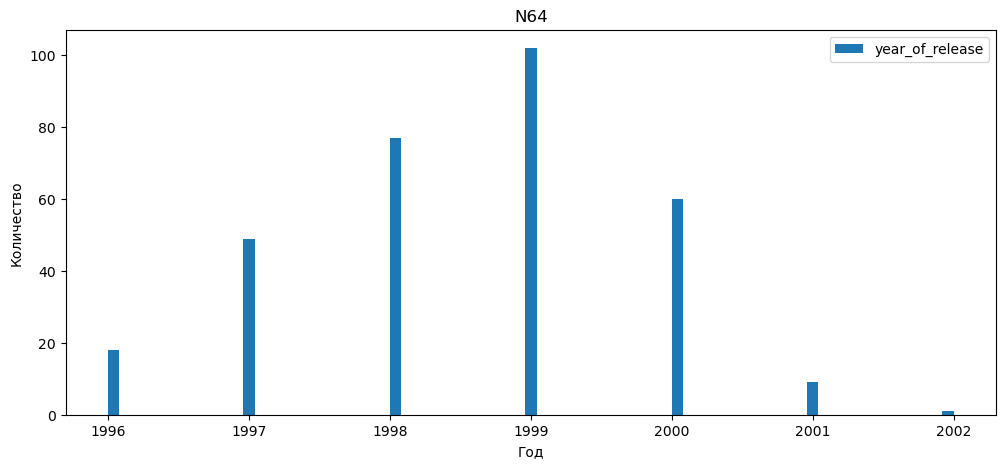

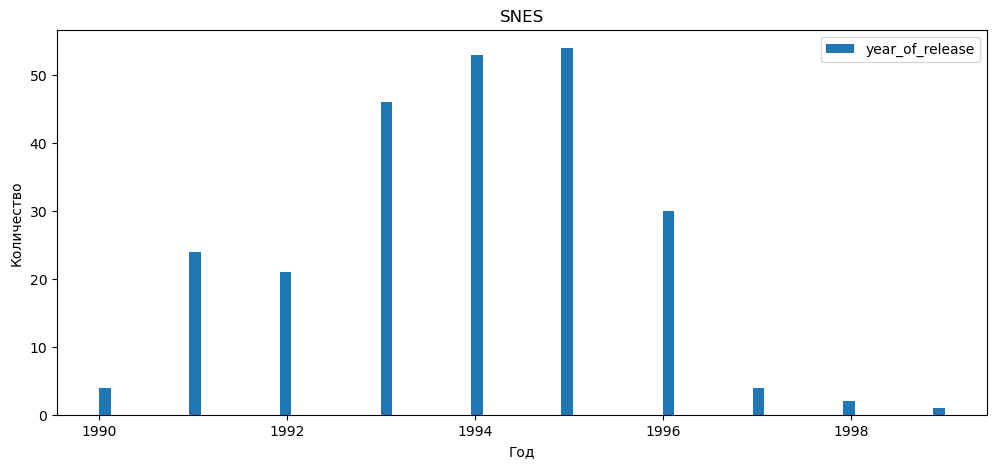

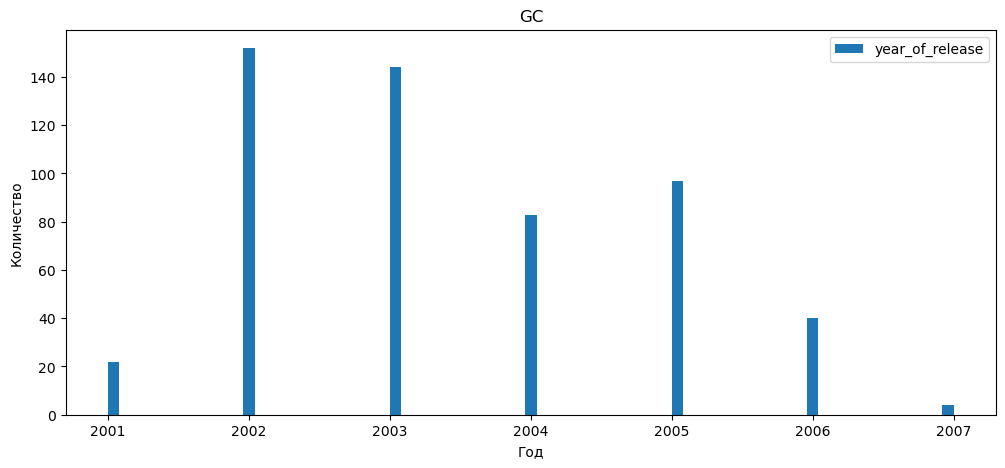

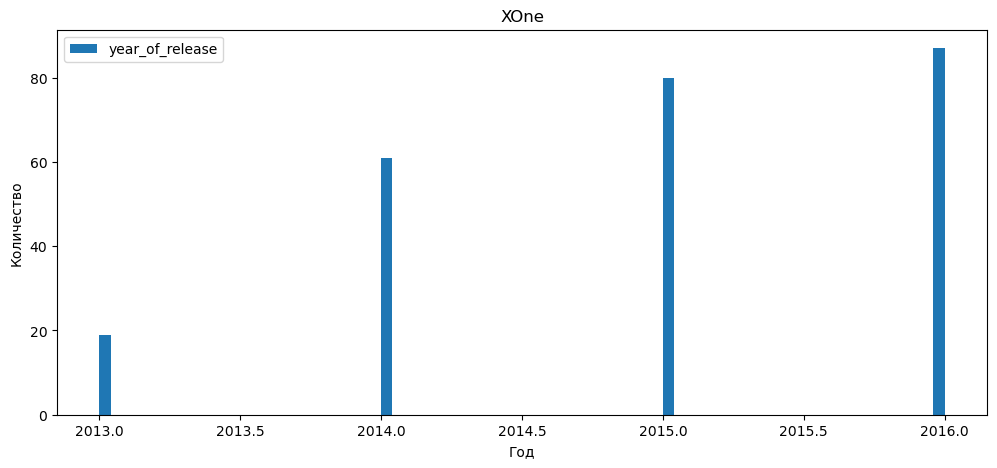

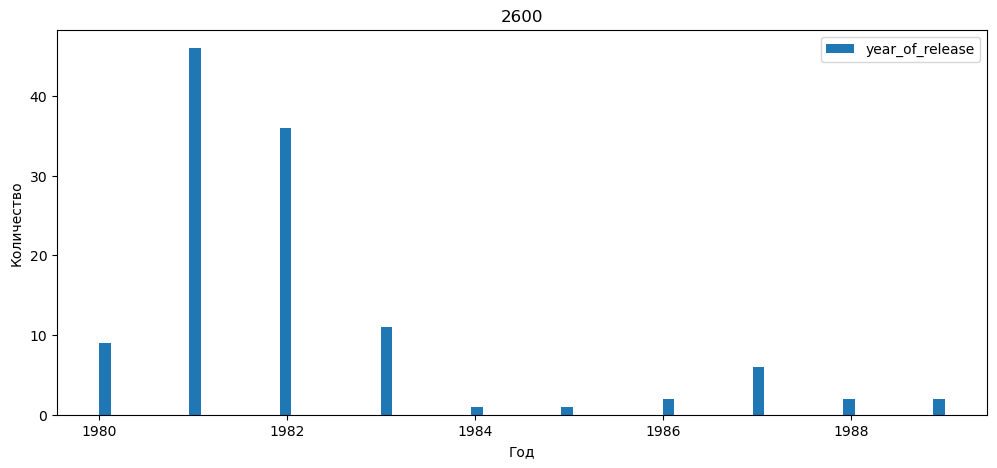

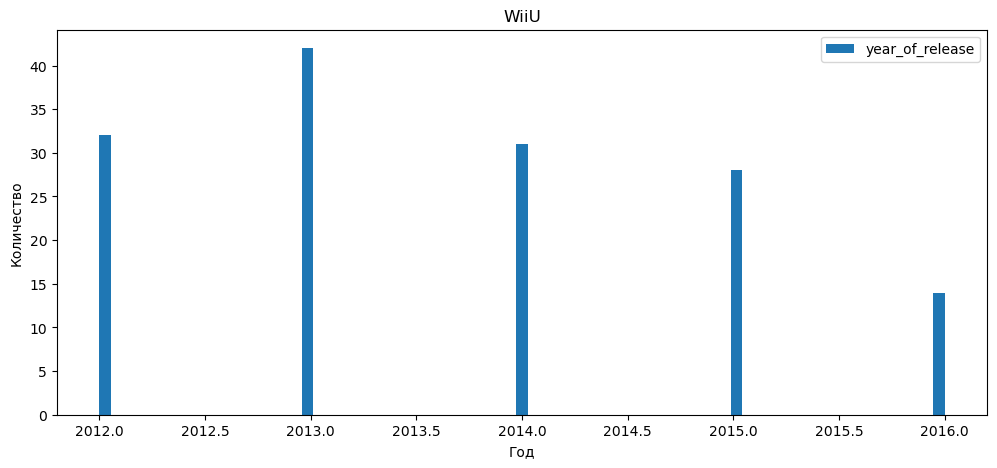

In [130]:
#Теперь построим расрпделение по годам для первых 20 платформ
for i in list(rating_platform.index)[0:20]:
    for name, data_1 in (data
                         .loc[(data['platform'] == i)]
                         .groupby('platform')):
        data_1.plot(kind='hist', 
                    y='year_of_release', 
                    title=name, 
                    bins=75, 
                    figsize=(12,5))
        plt.xlabel('Год')
        plt.ylabel('Количество')

По диаграммам видно, что характерный период появления и устаревания платформы составляет около 10 лет (не считая PC, это навечно) 

Судя по диаграммам и количеству продаж игр, можно сделать вывод, что PS4 является очень перспективной платформой, явно наблюдается рост количества выходящих на нее игр. Такая же картина наблюдается и с XOne. Также PC, игры стабильно на компьютер будут покупать, также это видно по тому, как начинает опять расти количество игр на PC c 2012 года. На данный момент основную прибыль приносят три платформы: PS2, X360, PS3. Но игры уже на них почти не выходят.

### Выбор актуального периода

Теперь работаем с данными после 2013 года, т.к. есть две перспективные платформы, вышедшие после 2013 года - XOne и PS4.

In [131]:
data_filt = data.loc[data['year_of_release'] > 2012]

### Выбор нескольких потенциально прибыльных платформ

Построим аналогичные таблицы и гистограммы, что и в предыдущих пунктах, но только для отфильтрованной таблицы

In [132]:
#Построим рейтинг платформ по суммарным продажам для отфильтрованной таблицы
rating_platform_filt = data_filt.groupby('platform').agg(total_sales=('total_sales','sum')).sort_values(by='total_sales', ascending=False)
rating_platform_filt

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


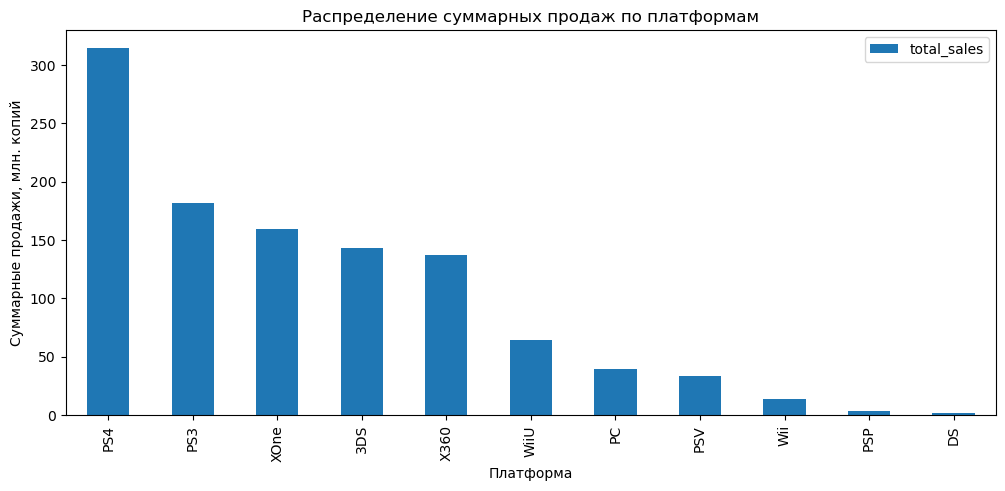

In [133]:
rating_platform_filt.plot(kind='bar', 
                  figsize=(12,5), 
                  title='Распределение суммарных продаж по платформам', 
                  xlabel='Платформа', 
                  ylabel='Суммарные продажи, млн. копий',);

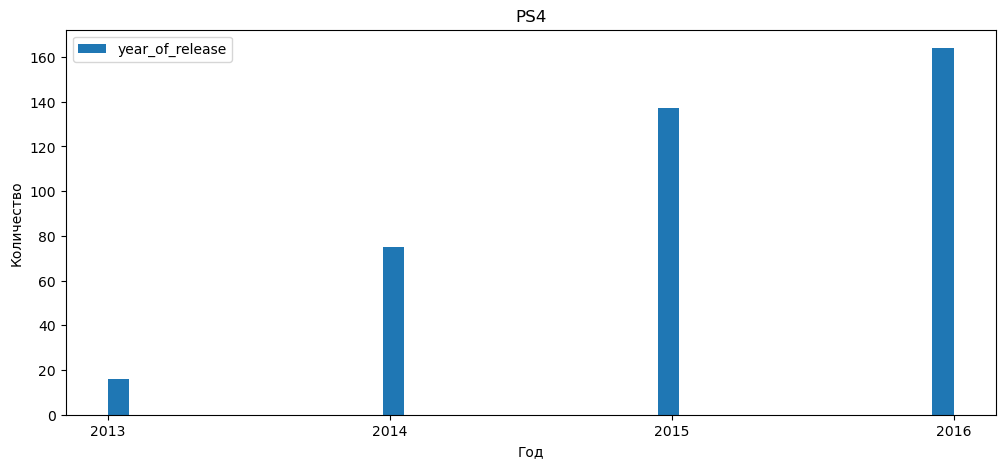

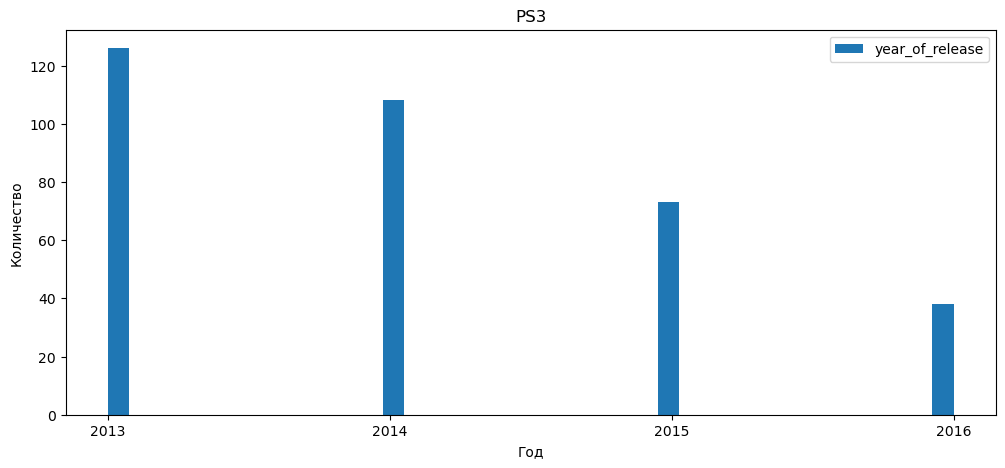

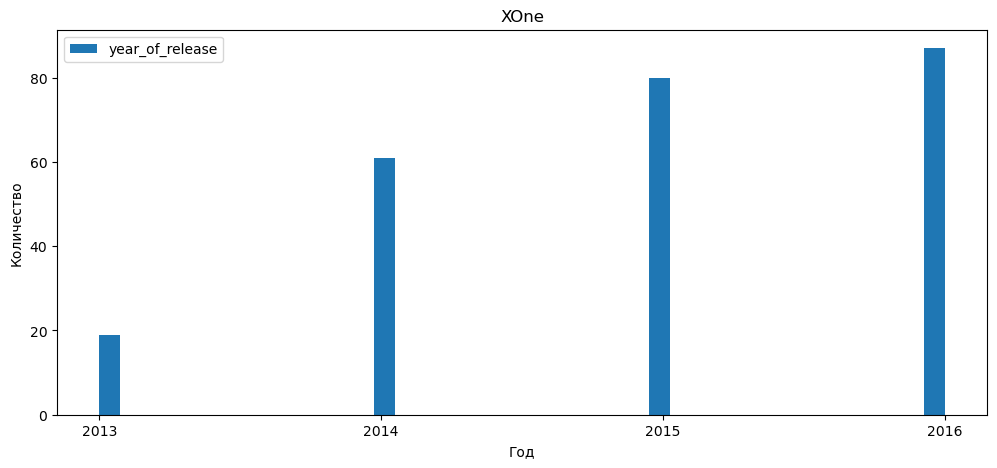

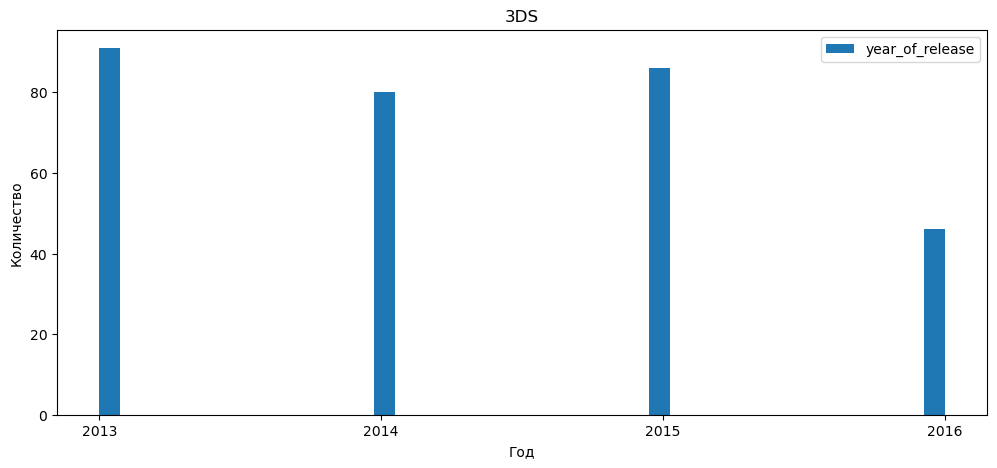

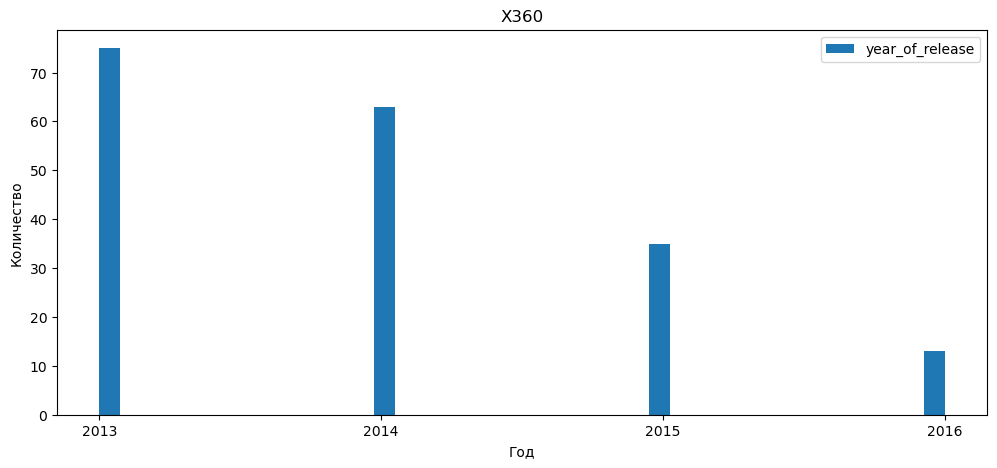

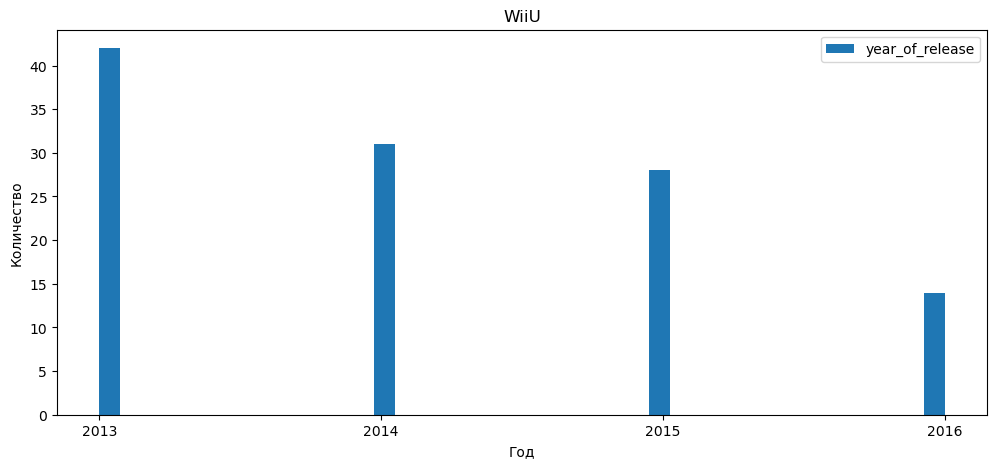

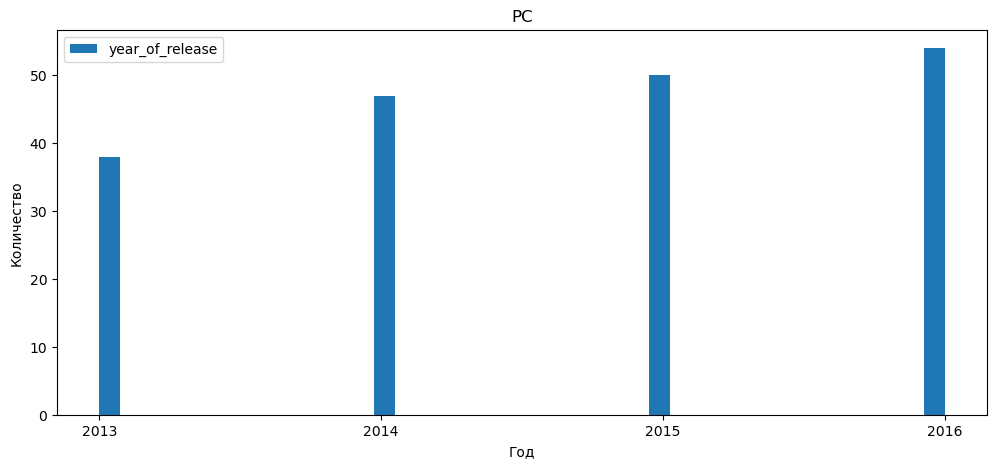

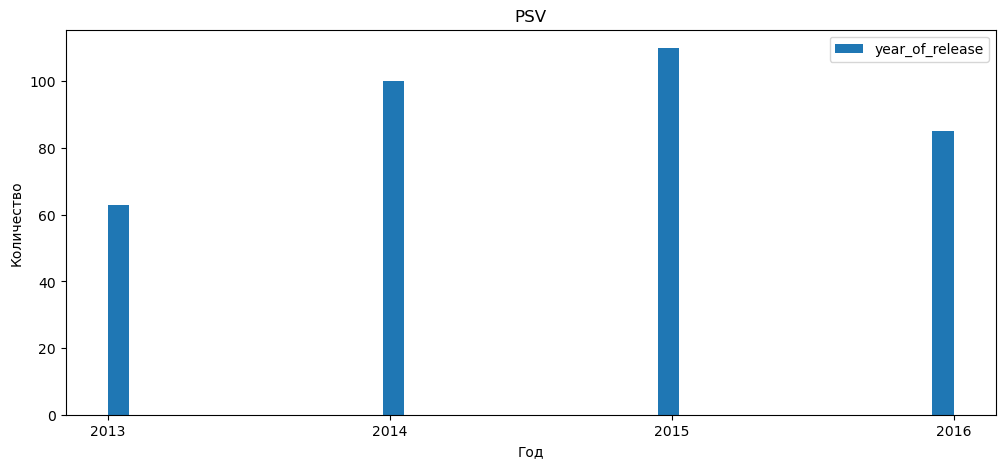

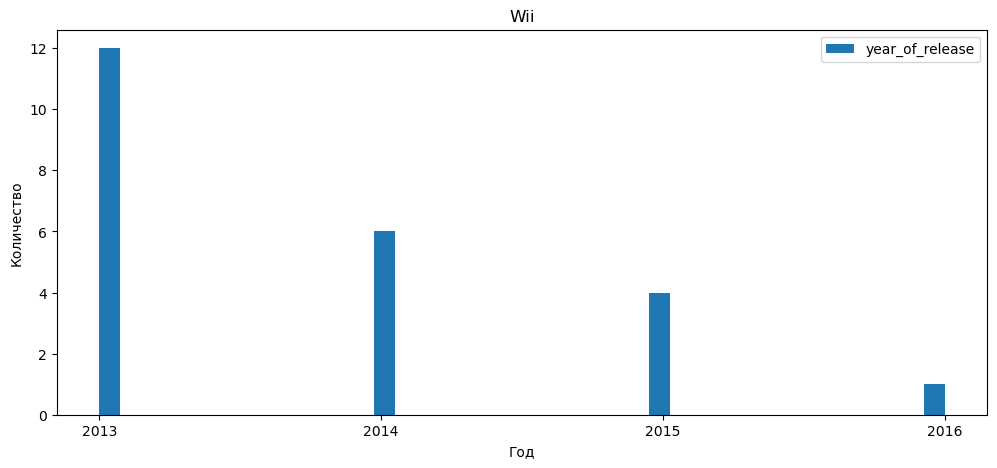

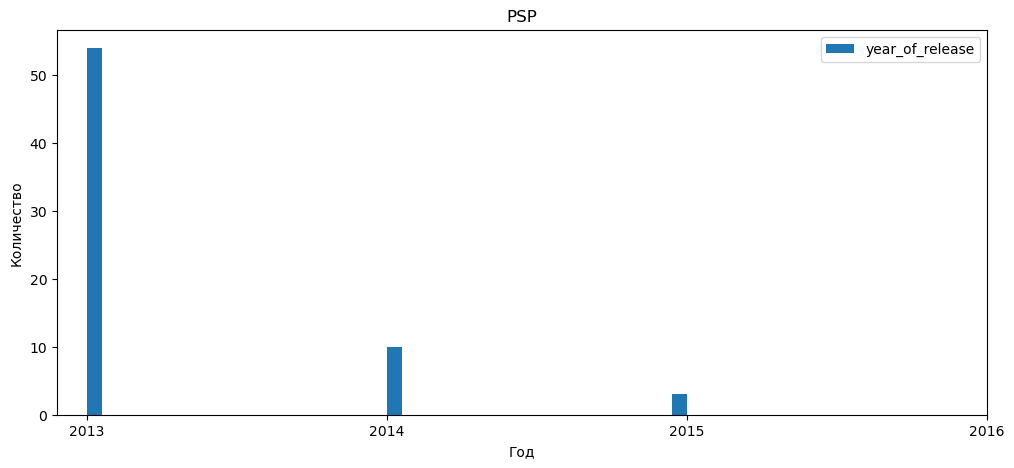

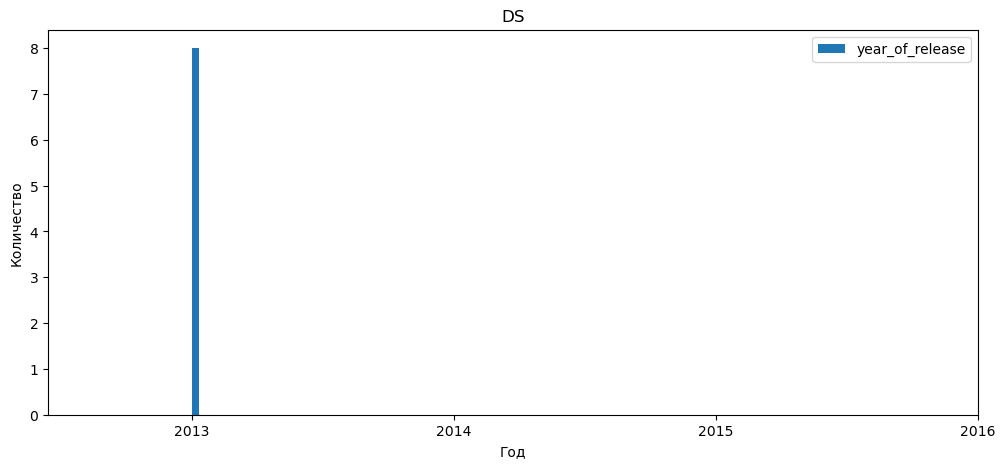

In [134]:
#Теперь построим расрпделение по годам
for i in list(rating_platform_filt.index):
    for name, data_1 in (data_filt
                         .loc[(data_filt['platform'] == i)]
                         .groupby('platform')):
        data_1.plot(kind='hist', 
                    y='year_of_release', 
                    title=name, 
                    bins=40,
                    xticks = (np.arange(2013,2017,1)),
                    figsize=(12,5))
        plt.xlabel('Год')
        plt.ylabel('Количество')

PS4 и XONE являются наиболее перспективными платформами согласно играм, выходящим после 2013 года. Эти платформы имеют самые большие продажи и постоянный рост выходящих игр. Также достаточно неплохо смотрится PC. Мы видим постоянный рост количества выходящих игр, но при этом можно наблюдать небольшую прибыль по сравнению с PS4, XONE и PS3.  Неоднозначно смотрится платформа 3DS c неплохими показателями до 2016 года, но в последний год количество игр резко снизилось. Есть до сих пор популярные старые платформы, например, PS3 и XBOX360, но количество выходящих на них игр резко и постоянно падает. \
**4 потенциально прибыльные платформы в 2017 году**: PS4, XONE, PC (из-за постоянно роста выходящих игр, для них вероятно прибыль будет продолжать расти), а также PS3 (из-за хороших продаж в период с 2013 года. Думаю, ее прибыльность снизится, но она все равно будет в топе).  

### Анализ потенциально прибыльных платформ

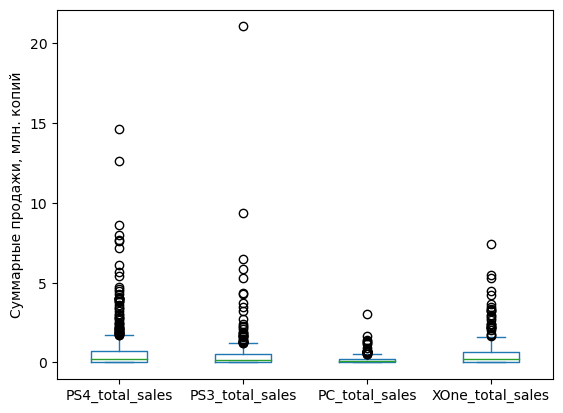

In [135]:
#Добавим в таблицу 4 стоблца, где будут толкьо суммарные продажи ссответственно для PS4,PS3,XOne и 
def add_columns(x):
    data_filt[f'{x}_total_sales'] = data_filt['total_sales']
    data_filt.loc[data_filt['platform'] != x, f'{x}_total_sales'] = None
    return(x)

for i in ['PS4','PS3','PC','XOne']:
    add_columns(i)
    
data_filt.plot(kind='box', 
               y=['PS4_total_sales', 'PS3_total_sales', 'PC_total_sales', 'XOne_total_sales'], 
               ylabel='Суммарные продажи, млн. копий'
              );

Теперь приблизим график, чтобы рассмотреть медиану и квантили

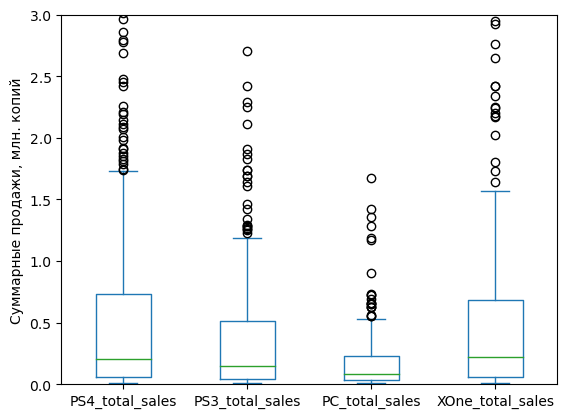

In [136]:
data_filt.plot(kind='box', 
               y=['PS4_total_sales', 'PS3_total_sales', 'PC_total_sales', 'XOne_total_sales'], 
               ylabel='Суммарные продажи, млн. копий',
               ylim = (0,3)
              );

Видно, что XOne и PS4 имеют примерно равное распределение суммарных продаж, это видно по медиане (в районе 0.2) и межквартильному размаху (в районе 0.7). Видно, что плотность выбросов у PS4 сильно выше, т.е. особо популярные игры чаще всего выпускаются на платформе PS4. У PS3 и PC медиана лежит ниже, чем у PS4 и XOne, межквартильный размах меньше (особенно у PC). Это может говорить о том, что PS3 и PC менее популярные платформы за период с 2013 года. Но у PS3 есть самый большой вылет, вероятно, это какой-то выпущенный шедевр и большую долю прибыли PS3 как раз приносят выбросы, т.е. особенно популярные игры. 

Для проверки влияния отзывов на продажи игр возьмем платформу PS4.

Коэффициент корреляции для critic_score: 0.41
Коэффициент корреляции для user_score: -0.03


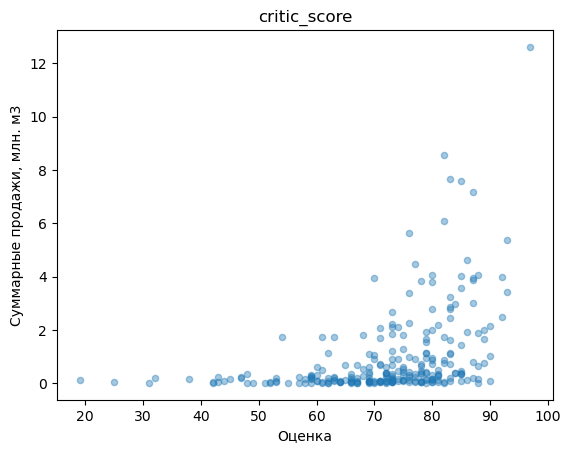

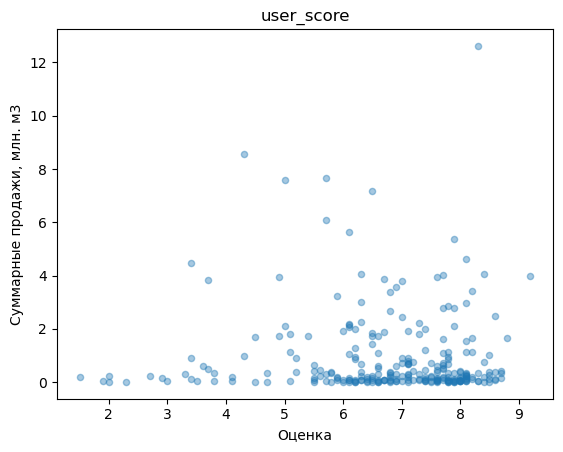

In [137]:
#Построим диаграмму рассеивания
for i in ['critic_score', 'user_score']:
    data_filt.loc[data_filt['platform'] == 'PS4'].plot(kind='scatter', 
                                                       x=i, 
                                                       y='total_sales', 
                                                       title=i,
                                                       ylabel='Суммарные продажи, млн. м3',
                                                       xlabel='Оценка',
                                                       alpha=0.4)
    print(f'Коэффициент корреляции для {i}:', 
          round(data_filt
                .loc[data_filt['platform'] == 'PS4', i]
                .corr(data_filt
                      .loc[data_filt['platform'] == 'PS4','total_sales']), 2))

По диаграммам рассеивания видно, что связь между оценкой критиков и продажей игр достаточно слабая. Что касается пользователей, так корреляция вообще отсутсвует. Критики все-таки имеют большее влияние на продажи, коэфф-т корреляции лучше, чем у пользователей. В целом, у критиков наблюдается прямая корреляция, чем больше оценка, тем лучше продажи. Этот вывод можно отнести и к остальным платформам.

Теперь рассмотрим распределение игр по жанрам

In [138]:
#Посмотрим на лучшие и худшие жанры
data_filt.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

Судя по общим продажам, самыми популярными жанрами являются Action, Shooter и Sports. Далее проверим средние и медианные значения.

In [139]:
(data_filt
 .groupby('genre')['total_sales']
 .agg(['mean', 'median','count'])
 .sort_values(by='mean', ascending=False)
)

,mean,median,count
genre,,,
Shooter,1.245882,0.450,187
Sports,0.703972,0.240,214
Platform,0.576081,0.225,74
Role-Playing,0.499623,0.125,292
Racing,0.469294,0.120,85
Fighting,0.441375,0.125,80
Action,0.420196,0.110,766
Misc,0.405290,0.100,155
Simulation,0.350968,0.100,62


Медианные и средние значения показывают, что шутеры и спорт обладают самыми высокими медианными и средними значениями. А вот Action имеет низкие значения, что говорит о том, что просто в этом жанре очень много игр, но они в среднем они достаточно низкого качества. Получается, что жанр шутер является наиболее стабильным по прибыльности.

**Выводы**:

Выполнен исследовательский анализ данных:

1) Основное количество игр выпускалось после 2000 года; <br>
2) Жизненный цикл платформы составляет примерно 10 лет; <br>
3) На данный момент основную прибыль приносят три платформы: PS2, X360, PS3; <br>
4) Перспективные по прибыльности платформы: PS4, XOne, PC и PS3; <br>
4) Наибольшей стабильностью в плане прибыльности обладают платформы XOne и PS4;<br>
5) Зависимость между продажами и рейтингом криктиов достаточно слабая, между продажами и рейтингом пользователей вообще отсутствует;<br>
6) Самый прибыльный жанр - Action, но в плане стабильности приноса прибыли - Shooter.<br>

Далее можно приступать к портрету пользователя каждого региона.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [140]:
#Для каждого региона выделим топ 5 платформ
def top_platform(x):
    print(data_filt.groupby('platform').agg({x:'sum'}).sort_values(by=x, ascending=False).head(5))
    return x

for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_platform(i)

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88
          other_sales
platform             
PS4             48.35
PS3             26.77
XOne            14.27
X360            12.11
3DS              6.28


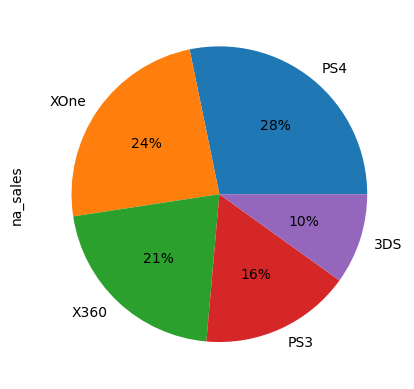

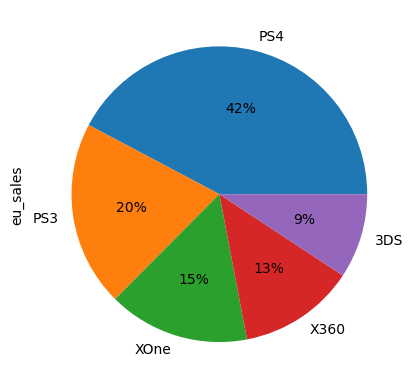

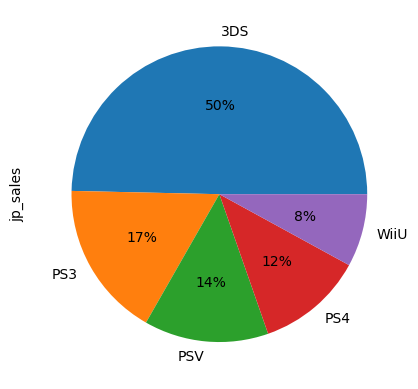

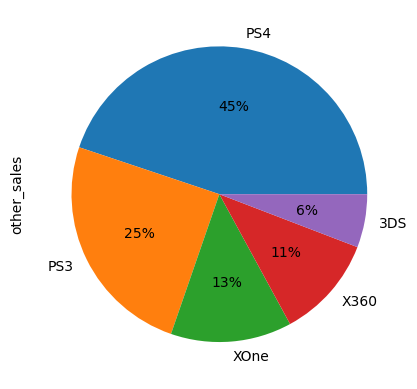

In [141]:
#Построим круговые диаграммы
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    plt.subplots()
    (data_filt
     .groupby('platform')
     .agg({i:'sum'})
     .sort_values(by=i, ascending=False)
     .head(5)[i]
     .plot(kind='pie', autopct='%1.0f%%')
    )

**Для Америки** самыми популярными платформами ялвяются PS4 и XOne. Популярность XBOX в Америке понятна, Microsoft - американская компания. <br>
**Для европейцев** одинаково популярны PS4 и PS3. <br>
**Для японцев** самая популярная платформа 3DS. Вероятно, из-за ее портативности, японцы всегда на работе или в дороге. К тому же, Nintendo - японская компания, также как и Sony. Логично, что XBOX в Японии не популярен. <br>
**Для других стран** распределение идентично европейскому.

### Самые популярные жанры (топ-5)

In [142]:
#Для каждого региона выделим топ 5 жанров
def top_genre(x):
    print(data_filt.groupby('genre')[x].agg('sum').sort_values(ascending=False).head(5))
    return x

for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_genre(i)

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64
genre
Action          37.20
Shooter         28.77
Sports          19.45
Role-Playing    11.48
Misc             6.09
Name: other_sales, dtype: float64


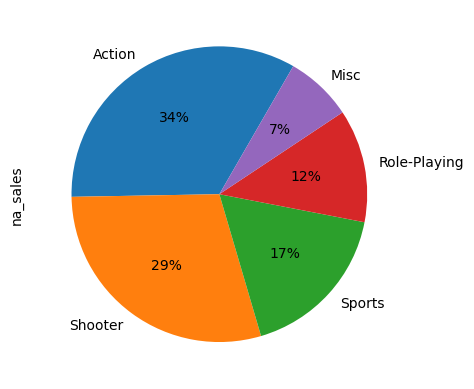

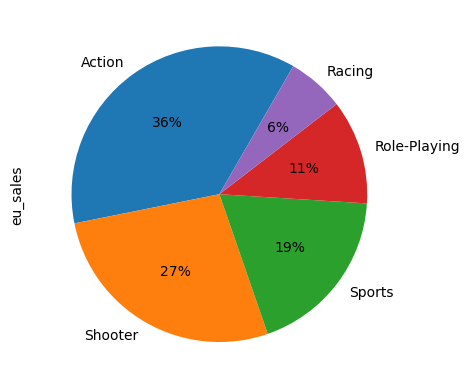

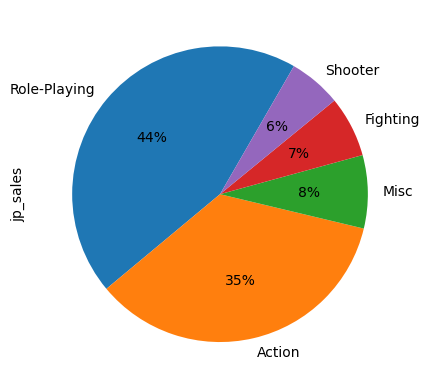

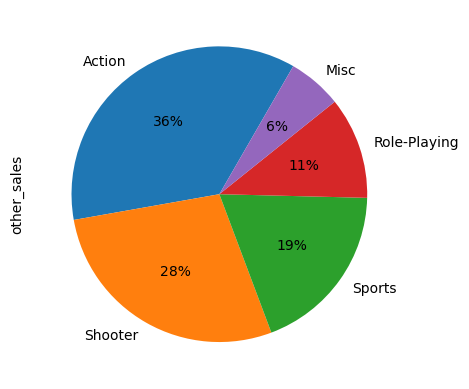

In [143]:
#Построим круговые диаграммы
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    plt.subplots()
    (data_filt
     .groupby('genre')
     .agg({i:'sum'})
     .sort_values(by=i, ascending=False)
     .head(5)[i]
     .plot(kind='pie', autopct='%1.0f%%', startangle=60)
    )

Почти для всех регионов самыми популярными жанрами являются экшн и шутер. <font color='green'>Но мы помним логику, что в Action много второсортных игр, а вот Shooter - самый стабильный жанр.</font> Кроме японцев, у них самый популярный жанр RPG. Ну тут все максимально логично, они помешаны на Доте, Варкрафте, Геншин Импакте и т.д. <br>
Также надо отметить, что и в этом случае остальные страны следуют за европейскими трендами

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Теперь проверим, влияет ли рейтинг на продажи в каждом регионе. Но перед этим пропущенные значения заменим на Not defined

In [144]:
#Заменим пропузенные значения на Not defined
data_filt['rating'] = data_filt['rating'].fillna('Not defined')

In [145]:
#Посмотрим, как жанры влияют на продажи
data_filt.pivot_table(index='rating', 
                      values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                      aggfunc='sum'
                     ).sort_values('na_sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,156.67,14.87,175.10,50.65
E,85.44,15.98,81.66,23.17
Not defined,61.36,80.82,72.72,17.98
E10+,45.20,6.27,56.38,13.21
T,43.56,22.84,51.85,14.96


Для всех регионов кроме Японии максимальные продажи имеют игры с рейтингом М ("для взрослых"), на втором месте с рейтингом Е ("для всех"). В Японии большинство продаж имеют игры с неопределенным рейтингом. Скорее всего, это какие-то локальные игры, которые не оцениваются организацией ESRB (или не отправляются туда).

**Выводы**:

Найден портрет пользователя каждого региона:

1) Американцы предпочитают играть на PS4 и XOne. Любимые жанры - Action и Shooter. В большинстве случаев покупают игры с рейтингом M (потом E); <br>
2) Европейцы предпочитают играть на PS4 и PS3. Любимые жанры - Action и Shooter. В большинстве случаев покупают игры с рейтингом M (потом E); <br>
3) Японцы предпочитают играть на 3DS и PS3. Любимый жанр - RPG. В большинстве случаев покупают какие-то локальные игры с неопределенным рейтингом; <br>
4) Люди, проживающие в остальном мире, имеют схожий портрет, что и европейцы. <br>

Далее проверим ряд гипотез.

## Проверка гипотез

Необходимо проверить гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; <br>
2) Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Примем их за нулевые гипотезы. От них будем отталкиваться. <br>
Альтернативные гипотезы: средние у двух выборок разные и одинаковые соответственно для двух нулевых гипотез. <br>
Также примем, что для обеих гипотез выборки будут идентичны и со схожей дисперсией. Уровень статичтической значимости примем 5%, чтобы проверить сначала для гипотезы для такой точности.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC различны \
**Уровень статистической значимости** примем 5% \
Для исследования примем метод для равенства двух средних генеральных совокупностей

In [146]:
#Проверяем нулевую гипотезу. Здесь гипотеза о равентстве двух средних генеральных совокупностей


alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_filt.loc[(data['platform'] == 'XOne') & (data['user_score'].isna() == False), 'user_score'], 
                       data_filt.loc[(data['platform'] == 'PC') & (data['user_score'].isna() == False), 'user_score']
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотеза отвергать нельзя, средние пользовательские рейтинги платформ Xbox One и PC действительно можно считать близкими друг к другу

### Средние пользовательские рейтинги жанров Action и Sports разные?

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковы \
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports различны \
**Уровень статистической значимости** примем 5% \
Для исследования примем метод для равенства двух средних генеральных совокупностей

In [147]:
#Проверяем вторую гипотезу. Здесь также гипотеза о равентстве двух средних генеральных совокупностей


alpha = 0.05 # уровень статистической значимости
# если p-value окажется больше него, отвергнем гипотезу

results = st.ttest_ind(data_filt.loc[(data['genre'] == 'Action') & (data['user_score'].isna() == False), 'user_score'], 
                       data_filt.loc[(data['genre'] == 'Sports') & (data['user_score'].isna() == False), 'user_score'],
                      )

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит, средние пользовательские рейтинги жанров Action и Sports действительно различны

**Выводы**:

Проверено 2 гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковы; <br>
2) Cредние пользовательские рейтинги жанров Action и Sports различны.

## Общие выводы

**Предобработка данных**:

* Изменены названия столбцов; <br>
* Таблица проверена на дубликаты; <br>
* Заменены пропущенные значения, где это было возможно <br>

**Исследовательский анализ данных**:

* Основное количество игр выпускалось после 2000 года; <br>
* Жизненный цикл платформы составляет примерно 10 лет; <br>
* На данный момент основную прибыль приносят три платформы: PS2, X360, PS3; <br>
* Перспективные по прибыльности платформы: PS4, XOne, PC и PS3; <br>
* Наибольшей стабильностью в плане прибыльности обладают платформы XOne и PS4;<br>
* Зависимость между продажами и рейтингом криктиов достаточно слабая, между продажами и рейтингом пользователей вообще отсутствует;<br>
* Самый прибыльный жанр - Action, но в плане стабильности приноса прибыли - Shooter.<br>

**Портрет пользователя каждого региона**:

* Американцы предпочитают играть на PS4 и XOne. Любимые жанры - Action и Shooter. В большинстве случаев покупают игры с рейтингом M (потом E); <br>
* Европейцы предпочитают играть на PS4 и PS3. Любимые жанры - Action и Shooter. В большинстве случаев покупают игры с рейтингом M (потом E); <br>
* Японцы предпочитают играть на 3DS и PS3. Любимый жанр - RPG. В большинстве случаев покупают какие-то локальные игры с неопределенным рейтингом; <br>
* Люди, проживающие в остальном мире, имеют схожий портрет, что и европейцы. <br>

**Проверка гипотез**:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковы; <br>
* Cредние пользовательские рейтинги жанров Action и Sports различны.